## Problem 1: Comparing Optimization Algorithms
Consider the function $f(x,y) = (1-x)^2 + 100(y-x^2)^2$, which has a global minimum at $x=1, y=1$. For this problem, you are going to explore using different optimization algorithms to find the global minimum, to gain an intuitive understanding of their different strengths and weaknesses.

(a) Make a contour plot of $f(x,y)$. You should observe a that the contour lines are “banana-shaped” around the global minimum point, which lies in a deep valley. In technical terms, we would say that the gradient of this function is strongly anisotropic, a fact that can cause slow or no convergence for optimization algorithms.

(b) In the code chunk below I have python code for three different optimization algorithms,**(1) stochastic gradient descent; (2) stochastic gradient descent with momentum, and (3) ADAM (ADAptive Moment Estimation)**. Starting at the initial point $x=-4, y=-2$, use each algorithm to find the minimum of the function $f$. Start with a learning rate of $k=10^{-4}$ for all three algorithms, and run the algorithm for $10^5$ timesteps. Plot the trajectories of each algorithm and the log base 10 of the error rate as a function of the time step. What do you notice about the performance of the difference algorithms, both in terms of convergence speed and ultimate accuracy?

```{python}
def gd(grad, init, n_epochs=1000, eta=10**-4):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        v=eta*(np.array(grad(params)))
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, beta=0.9,gamma=0.9):
    params=np.array(init) # Start with initial condition
    param_traj=np.zeros([n_epochs+1,2]) # Save the entire trajecotry
    param_traj[0,]=init # Also save the initial condition to the trajectory
    
    v=0 # Starting with 0 momentum
    
    # Epochs is borrowing term from machine learning
    # Here it means timestep
    
    for j in range(n_epochs):
        v=gamma*v+(np.array(grad(params))) # Compute v
        params=params-eta*v  # Update the location
        param_traj[j+1,]=params # Save the trajectory
    return param_traj

def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        g=np.array(grad(params))
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma**(j+1))
        grad_sq_hat=grad_sq/(1-beta**(j+1))
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj
```

(c) Perform the same experiment for the learning rate $k=10^{-3}$, only comparing ADAM and gradient descent with momentum. You will likely observe that one of the methods does not converge, keep the same range of values for your trajectory/contour plot as you did in (b). Which method worked better with $k=10^{-3}$.

(d) Now perform a comparison between ADAM with $k=10^{-2}$ against gradient descent with momentum using $k=10^{-4}$. What are the trade-offs between the two methods for these values of the learning rate?

**Solution:**

(a) The first figure shows the classic "banana-shaped" level sets of the function $f(x,y) = (1-x)^2 + 100(y-x^2)^2$, the global minimum, (1,1), sits at the bottom of a long, narrow curved valley, making it challenging for optimization algorithms to navigate. Along the valley sides, the contour lines are closely packed (steep gradients), along the valley floor, they are widely spaced (small gradients). Algorithms have to deal with quite various gradient magnitudes in different directions under this anisotropic gradient structure.

(b) We implemented gradient descent, gradient descent with momentum, and ADAM optimization algorithms starting from the point (-4,-2) with a learning rate of $10^{-4}$ for $10^5$ iterations.

Gradient descent takes a direct but inefficient path. It heads slowly toward the minimum but fails to navigate the curved valley effectively. Even after many iterations, it's barely made progress, especially toward the end. Gradient descent with momentum starts off much like plain GD, following a similar trail at first. But then it picks up speed and overshoots wildly in the y-direction. But it eventually converges to the minimum with remarkable accuracy. Eventually, though, it settles down and zeroes in on the minimum with impressive precision. Adam, on the other hand, takes a smarter approach. It tracks the valley's contours, makes a sharp pivot when it hits the valley floor, and then goes toward the minimum.

In terms of performance, basic gradient descent is a slog. After 100,000 iterations, it's still nowhere near the target, with an error of about 0.01 and a final position around [0.994, 0.989]. Gradient descent with momentum converges dramatically faster than GD. It reaches high precision (error < $10^{-12}$) around iteration 80,000, with a final position effectively at [1.0, 1.0]. Adam's convergence behavior first progresses slowly, then rapidly improves around iteration 50,000 when it finds the valley floor, then stabilizes with small oscillations around $10^{-6}$ error. Final position is approximately [0.99999, 1.00001].

Plain gradient descent really struggles with this function, which shows why it's often a poor choice for tricky optimization problems. Adding momentum is a game-changer, it speeds things up dramatically and nails the final accuracy, though it can bounce around a lot during training. Adam moves steadily toward the minimum without the wild swings of momentum. For this particular problem, gradient descent with momentum comes out on top for final accuracy, with Adam close behind. Basic GD, though, is left behind.

(c) For the learning rate $10^{-3}$, GD with momentum completely diverges, with parameter values exploding to extremely large numbers, the error rapidly increases to enormous values rather than decreasing, the algorithm is unstable at this learning rate, as shown by the runtime warnings about numerical overflow. But Adam remains stable and converges successfully, reaches a good approximation of the minimum with reasonable error values, and shows robustness to higher learning rates. As a result, Adam is much more robust to learning rate changes than GD with momentum. GD with momentum worked well with a smaller learning rate ($10^{-4}$), but it becomes completely unstable when the rate is increased by just one order of magnitude. Adam, on the other hand, handles this higher learning rate without any issues.

(d) We compared Adam with a relatively high learning rate $10^{-2}$ against GD with momentum using a lower learning rate $10^{-4}$. Adam converges much more rapidly, making significant progress toward the minimum in very few iterations
GD with momentum converges more gradually, taking many more iterations to reach the same error level. GD with momentum eventually reaches extremely high precision (error around $10^{-12}$). Adam plateaus at a moderate precision (error around $10^{-3}$ to $10^{-4}$) with small oscillations. Adam takes a more direct path to the valley floor, then follows it to the minimum. GD with momentum follows a more elaborate spiral pattern, eventually converging with high precision

The key trade-off between these methods is between speed and ultimate accuracy. Adam with a higher learning rate provides rapid initial convergence but may not achieve the highest possible precision. GD with momentum using a carefully tuned lower learning rate converges more slowly but can ultimately reach higher precision. From this problem, we see why Adam is often preferred for practical machine learning applications, where getting to a good solution quickly is usually more important. But for applications requiring extremely high precision, GD with momentum preferable.

In [7]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random

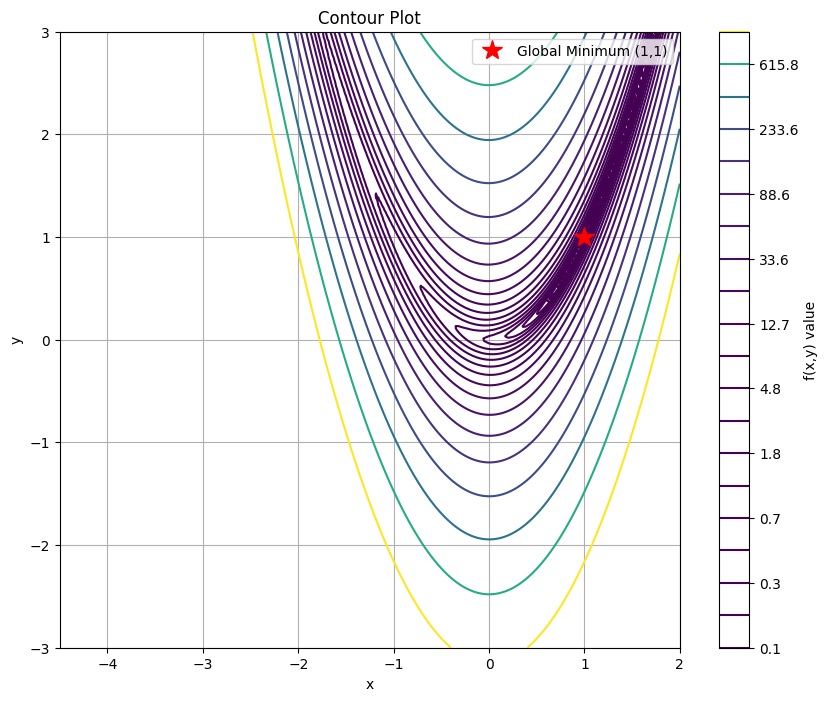

In [2]:
#Function
np.random.seed(42)
def define_function(params):
    x, y = params
    return (1 - x)**2 + 100 * (y - x**2)**2

#Gradient
def func_grad(params):
    x, y = params
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

#Optimization algorithms
def gd(grad, init, n_epochs=1000, eta=10**-4):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        v=eta*(np.array(grad(params)))
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, beta=0.9,gamma=0.9):
    params=np.array(init) # Start with initial condition
    param_traj=np.zeros([n_epochs+1,2]) # Save the entire trajecotry
    param_traj[0,]=init # Also save the initial condition to the trajectory

    v=0 # Starting with 0 momentum

    # Epochs is borrowing term from machine learning
    # Here it means timestep

    for j in range(n_epochs):
        v=gamma*v+(np.array(grad(params))) # Compute v
        params=params-eta*v  # Update the location
        param_traj[j+1,]=params # Save the trajectory
    return param_traj

def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        g=np.array(grad(params))
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma**(j+1))
        grad_sq_hat=grad_sq/(1-beta**(j+1))
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

#Contour plot
x = np.linspace(-4.5, 2, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
  for j in range(len(y)):
    Z[j, i] = define_function([X[j, i], Y[j, i]])

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
plt.colorbar(label='f(x,y) value')
plt.plot(1, 1, 'r*', markersize=15, label='Global Minimum (1,1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot')
plt.legend()
plt.grid(True)
plt.show()

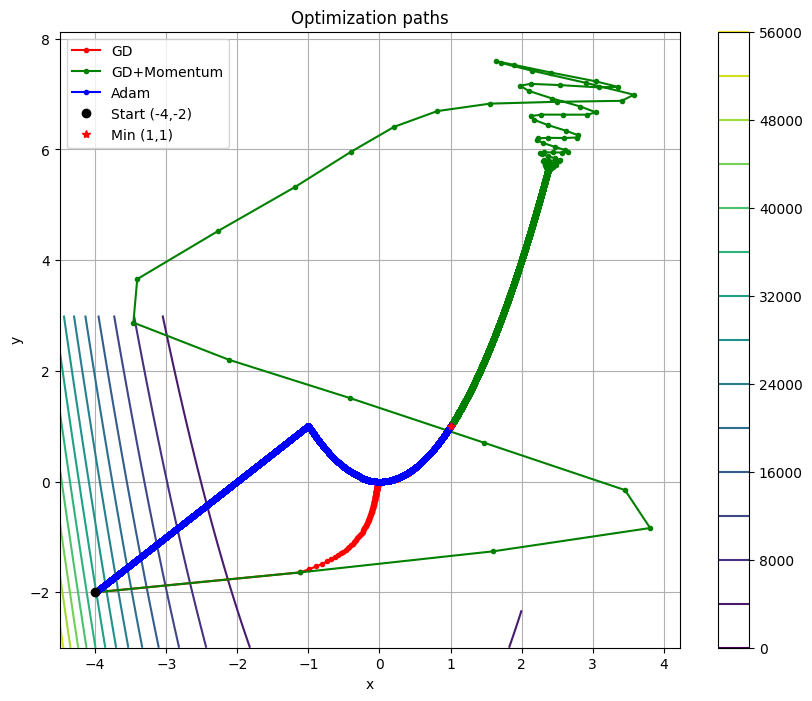

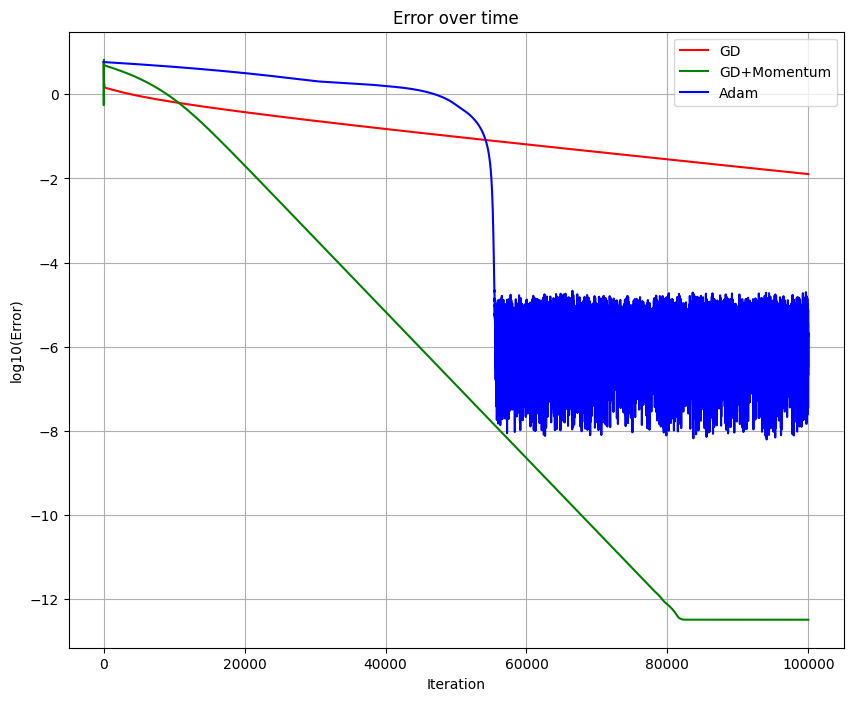


Final positions:
Gradient Descent: [0.99433318 0.98867571] (Error: 0.01266303)
GD with Momentum: [1. 1.] (Error: 0.00000000)
Adam: [0.99999479 1.00000519] (Error: 0.00000736)

Convergence iteration (error < 0.01):
Gradient Descent: Did not converge to 0.01 accuracy
GD with Momentum: 21778
Adam: 55017


In [3]:
#Compare optimization algorithms
np.random.seed(42)
def compare_optimizers_b():
    #Starting point
    init_point = [-4, -2]

    #Number of timesteps
    n_epochs = 10**5

    #Learning rate
    eta = 10**-4

    #Three optimization algorithms
    gd_traj = gd(func_grad, init_point, n_epochs, eta)
    gd_mom_traj = gd_with_mom(func_grad, init_point, n_epochs, eta)
    adam_traj = adams(func_grad, init_point, n_epochs, eta)

    #Calculate error
    min_point = np.array([1, 1])
    gd_errors = np.sqrt(np.sum((gd_traj - min_point)**2, axis=1))
    gd_mom_errors = np.sqrt(np.sum((gd_mom_traj - min_point)**2, axis=1))
    adam_errors = np.sqrt(np.sum((adam_traj - min_point)**2, axis=1))

    #Grid for the contour plot
    x = np.linspace(-4.5, 2, 250)
    y = np.linspace(-3, 3, 250)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[j, i] = define_function([X[j, i], Y[j, i]])

    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=15)
    plt.colorbar()
    plt.plot(gd_traj[:, 0], gd_traj[:, 1], 'r.-', label='GD')
    plt.plot(gd_mom_traj[:, 0], gd_mom_traj[:, 1], 'g.-', label='GD+Momentum')
    plt.plot(adam_traj[:, 0], adam_traj[:, 1], 'b.-', label='Adam')
    plt.plot(init_point[0], init_point[1], 'ko', label='Start (-4,-2)')
    plt.plot(1, 1, 'r*', label='Min (1,1)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimization paths')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Plot log10 of errors
    plt.figure(figsize=(10, 8))
    x_vals = range(0, len(gd_errors))
    plt.plot(x_vals, np.log10(gd_errors), 'r-', label='GD')
    plt.plot(x_vals, np.log10(gd_mom_errors), 'g-', label='GD+Momentum')
    plt.plot(x_vals, np.log10(adam_errors), 'b-', label='Adam')
    plt.xlabel('Iteration')
    plt.ylabel('log10(Error)')
    plt.title('Error over time')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Final positions and errors
    print("\nFinal positions:")
    print(f"Gradient Descent: {gd_traj[-1]} (Error: {gd_errors[-1]:.8f})")
    print(f"GD with Momentum: {gd_mom_traj[-1]} (Error: {gd_mom_errors[-1]:.8f})")
    print(f"Adam: {adam_traj[-1]} (Error: {adam_errors[-1]:.8f})")

    #Convergence iteration (when error first goes below 0.01)
    gd_converge = np.argmax(gd_errors < 0.01) if np.any(gd_errors < 0.01) else "Did not converge to 0.01 accuracy"
    gd_mom_converge = np.argmax(gd_mom_errors < 0.01) if np.any(gd_mom_errors < 0.01) else "Did not converge to 0.01 accuracy"
    adam_converge = np.argmax(adam_errors < 0.01) if np.any(adam_errors < 0.01) else "Did not converge to 0.01 accuracy"

    print("\nConvergence iteration (error < 0.01):")
    print(f"Gradient Descent: {gd_converge}")
    print(f"GD with Momentum: {gd_mom_converge}")
    print(f"Adam: {adam_converge}")

    return gd_traj, gd_mom_traj, adam_traj, gd_errors, gd_mom_errors, adam_errors

gd_traj, gd_mom_traj, adam_traj, gd_errors, gd_mom_errors, adam_errors = compare_optimizers_b()

<ipython-input-2-09adc509a266>:10: RuntimeWarning: overflow encountered in scalar power
  dx = -2 * (1 - x) - 400 * x * (y - x**2)
<ipython-input-2-09adc509a266>:11: RuntimeWarning: overflow encountered in scalar power
  dy = 200 * (y - x**2)
<ipython-input-2-09adc509a266>:10: RuntimeWarning: invalid value encountered in scalar subtract
  dx = -2 * (1 - x) - 400 * x * (y - x**2)
<ipython-input-2-09adc509a266>:11: RuntimeWarning: invalid value encountered in scalar subtract
  dy = 200 * (y - x**2)
<ipython-input-4-46ab67e4ffe8>:18: RuntimeWarning: overflow encountered in square
  gd_mom_errors = np.sqrt(np.sum((gd_mom_traj - min_point)**2, axis=1))


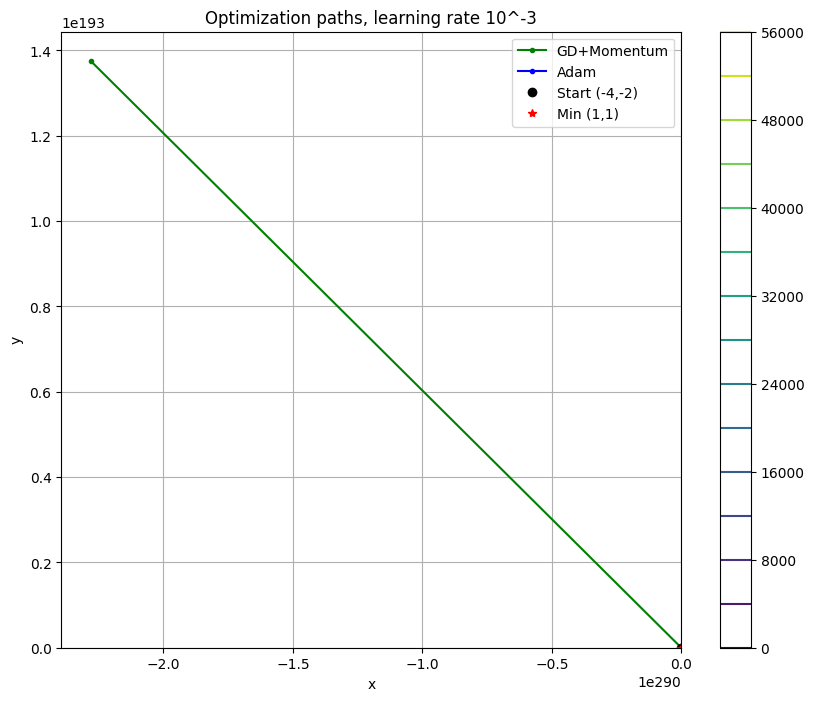

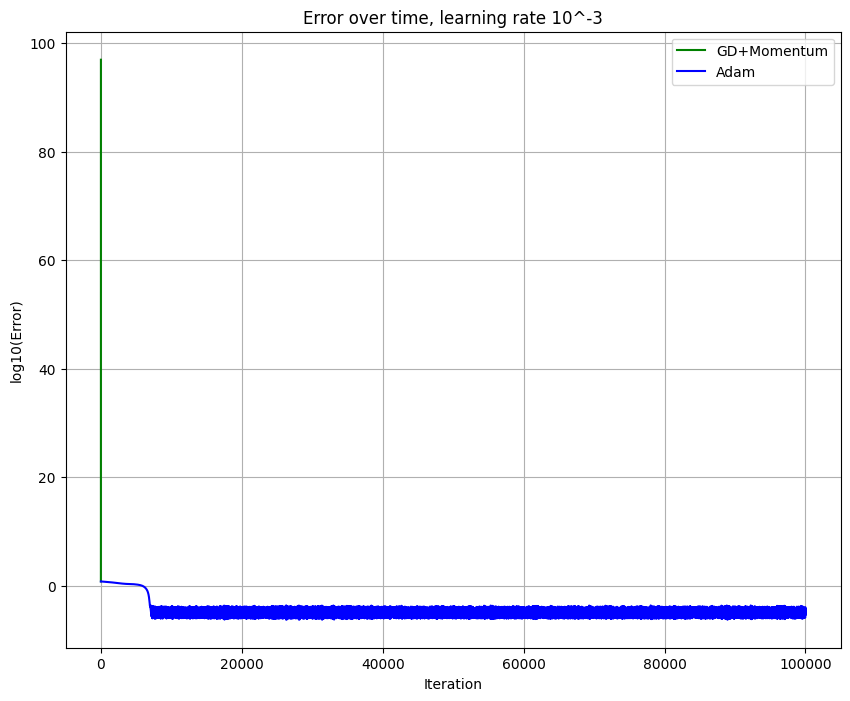


Final positions with learning rate k=10^-3:
GD with Momentum: [nan nan] (Error: nan)
Adam: [1.00001807 0.99998026] (Error: 0.00002676)


In [4]:
np.random.seed(42)
def compare_optimizers_c():
    #Starting point
    init_point = [-4, -2]

    #Number of timesteps
    n_epochs = 10**5

    #Learning rate
    eta = 10**-3

    #Two optimization algorithms
    gd_mom_traj = gd_with_mom(func_grad, init_point, n_epochs, eta)
    adam_traj = adams(func_grad, init_point, n_epochs, eta)

    #Calculate error
    min_point = np.array([1, 1])
    gd_mom_errors = np.sqrt(np.sum((gd_mom_traj - min_point)**2, axis=1))
    adam_errors = np.sqrt(np.sum((adam_traj - min_point)**2, axis=1))

    #Grid for the contour plot
    x = np.linspace(-4.5, 2, 250)
    y = np.linspace(-3, 3, 250)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(len(x)):
        for j in range(len(y)):
            Z[j, i] = define_function([X[j, i], Y[j, i]])

    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=15)
    plt.colorbar()
    plt.plot(gd_mom_traj[:, 0], gd_mom_traj[:, 1], 'g.-', label='GD+Momentum')
    plt.plot(adam_traj[:, 0], adam_traj[:, 1], 'b.-', label='Adam')
    plt.plot(init_point[0], init_point[1], 'ko', label='Start (-4,-2)')
    plt.plot(1, 1, 'r*', label='Min (1,1)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimization paths, learning rate 10^-3')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Plot log10 of errors
    plt.figure(figsize=(10, 8))
    plt.plot(np.log10(gd_mom_errors), 'g-', label='GD+Momentum')
    plt.plot(np.log10(adam_errors), 'b-', label='Adam')
    plt.xlabel('Iteration')
    plt.ylabel('log10(Error)')
    plt.title('Error over time, learning rate 10^-3')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Final positions and errors
    print("\nFinal positions with learning rate k=10^-3:")
    print(f"GD with Momentum: {gd_mom_traj[-1]} (Error: {gd_mom_errors[-1]:.8f})")
    print(f"Adam: {adam_traj[-1]} (Error: {adam_errors[-1]:.8f})")

    return gd_mom_traj, adam_traj, gd_mom_errors, adam_errors

gd_mom_traj_c, adam_traj_c, gd_mom_errors_c, adam_errors_c = compare_optimizers_c()

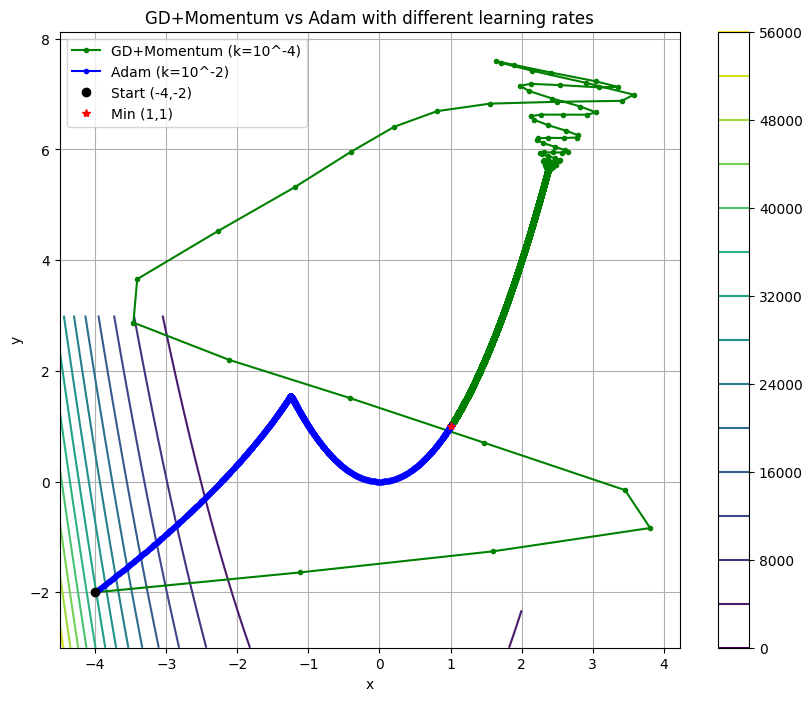

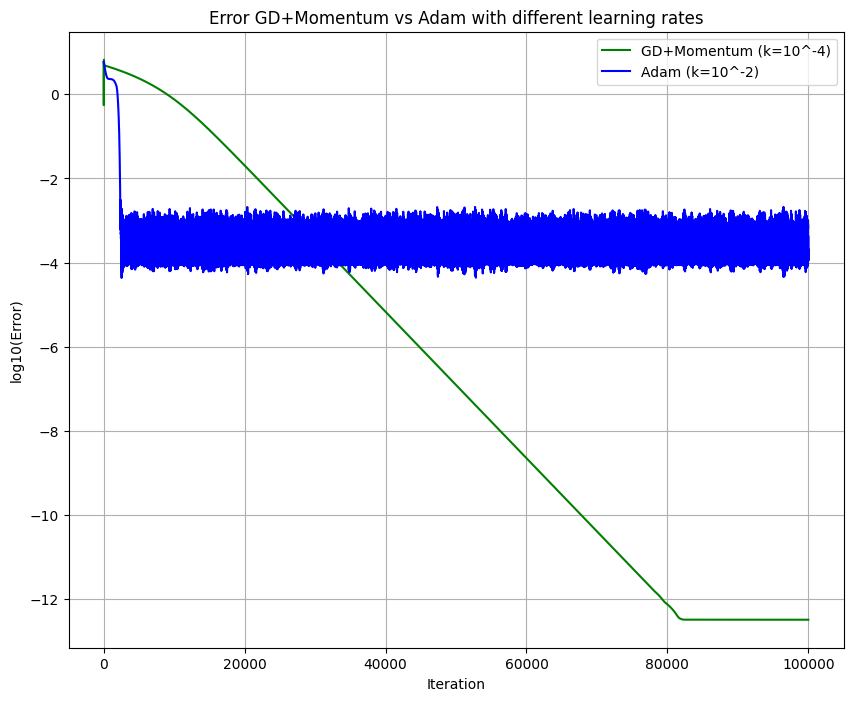


Final positions with different learning rates:
GD with Momentum (k=10^-4): [1. 1.] (Error: 0.00000000)
Adam (k=10^-2): [1.00005344 0.99980312] (Error: 0.00020400)


In [5]:
np.random.seed(42)
def compare_optimizers_d():
    #Starting point
    init_point = [-4, -2]

    #Number of timesteps
    n_epochs = 10**5

    #Learning rate
    eta_gd_mom = 10**-4
    eta_adam = 10**-2

    #Two optimization algorithms
    gd_mom_traj = gd_with_mom(func_grad, init_point, n_epochs, eta_gd_mom)
    adam_traj = adams(func_grad, init_point, n_epochs, eta_adam)

    #Calculate error
    min_point = np.array([1, 1])
    gd_mom_errors = np.sqrt(np.sum((gd_mom_traj - min_point)**2, axis=1))
    adam_errors = np.sqrt(np.sum((adam_traj - min_point)**2, axis=1))

    #Grid for the contour plot
    x = np.linspace(-4.5, 2, 250)
    y = np.linspace(-3, 3, 250)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(len(x)):
        for j in range(len(y)):
            Z[j, i] = define_function([X[j, i], Y[j, i]])

    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=15)
    plt.colorbar()
    plt.plot(gd_mom_traj[:, 0], gd_mom_traj[:, 1], 'g.-', label='GD+Momentum (k=10^-4)')
    plt.plot(adam_traj[:, 0], adam_traj[:, 1], 'b.-', label='Adam (k=10^-2)')
    plt.plot(init_point[0], init_point[1], 'ko', label='Start (-4,-2)')
    plt.plot(1, 1, 'r*', label='Min (1,1)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('GD+Momentum vs Adam with different learning rates')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Plot log10 of errors
    plt.figure(figsize=(10, 8))
    plt.plot(np.log10(gd_mom_errors), 'g-', label='GD+Momentum (k=10^-4)')
    plt.plot(np.log10(adam_errors), 'b-', label='Adam (k=10^-2)')
    plt.xlabel('Iteration')
    plt.ylabel('log10(Error)')
    plt.title('Error GD+Momentum vs Adam with different learning rates')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Final positions and errors
    print("\nFinal positions with different learning rates:")
    print(f"GD with Momentum (k=10^-4): {gd_mom_traj[-1]} (Error: {gd_mom_errors[-1]:.8f})")
    print(f"Adam (k=10^-2): {adam_traj[-1]} (Error: {adam_errors[-1]:.8f})")

    return gd_mom_traj, adam_traj, gd_mom_errors, adam_errors

gd_mom_traj_d, adam_traj_d, gd_mom_errors_d, adam_errors_d = compare_optimizers_d()

##Problem 2: Shallow Nets and MNIST

For this exercise, we will work on one of the standard model problems in Machine Learning, classifying handwritten digits. We will use an adaptation of the neural network code from your reading assignment to pytorch, which is one of the leading frameworks for training neural networks. pytorch is fairly flexible, you can use it with the CPU on your personal computer, with GPUs, and even on computing clusters. If you have trouble getting pytorch to work on your own computer I recommend trying in on google colab, or alternatively you are welcome to develop your own implementation. This and the next assignment have helper code in the provided ipython notebook Lab 7 Helper Noteook

First, you should acquire the MNIST dataset. This can be downloaded automatically using pytorch via the following code chunk:

```{python}
# Here is some code that automatically downlaods the MNIST data. Technically it will also read the
# data in if you have already downloaded and the path points to the folder where you have the files
# There will be 4 binary files which together contain the testing and training examples and the labels
# for the testing and training examples.

from torchvision import datasets, transforms

# Load MNIST

# transform defines a function which takes an image file, converts the analog bits into floating point
# numbers (it's a literal image file in the data), and then flattens the file. Each image is 28x28
# so at the end we get a 784x1 vector

transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

# The first line downloads the entire MNIST dataset to the data directory (or whereever you want it)
# If the data is already there, this won't download it. THis downloads both the training and testing data.
# the transform keyword applies the transform defined above, the train dataset has 60,000 examples, and
# the test dataset has 10,000 examples. The train and test data is loaded in the variables.

train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)
```

We are going to train a simple neural network to classify the MNIST images. The neural network has an input layer of 784 neurons (one for each pixel), a 30 neuron hidden layer, and a 10 neuron output layer, which provided a weight that corresponds to the predictions of the neural network for each class. Initially we will use sigmoidal neurons to process the inputs. Throughout the rest of the assignment you will use and improve the code in this file to study the performance of different combinations of network structure, optimization algorithm choice, hyperparameters, and activation functions.

The initial configuration of the neural network uses stochastic gradient descent without momentum. The following code sets several key hyperparameters and trains the neural network:

```{python}
# batch_size determines the minibatch size

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Initialize network
net = Network([784, 30, 10])

# Train
sol = train(net, train_loader, epochs=30, eta=0.001, test_data=test_loader)
```


Additional parameters can be changed within the code of the function itself (and you can organize your code in any way you see fit), in the train function:

```{python}
    optimizer = optim.SGD(network.parameters(),momentum=0.8,nesterov=True, lr=eta,weight_decay=1e-5)
    
    # This uncomment this (and comment the above line) if you want to use ADAM. The betas are the memory
    # parameters, you can experiment with these hyperparaeters if you like:
    #optimizer = optim.Adam(network.parameters(),betas = (0.9,0.999), lr=eta,weight_decay=1e-5)

    # Here is code for using learning rate scheduling. You might find this helpful
    #step_size = 2
    #gamma = 0.7
    #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
```

and also in the class function:

```{python}
class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)
        
        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.xavier_normal_(layer.weight)   # Good initialization for shallow/sigmoid nets
            #nn.init.kaiming_normal_(layer.weight, mode='fan_out', nonlinearity='relu') initialization for relus
            #nn.init.kaiming_uniform_(layer.weight, mode='fan_out', nonlinearity='relu') initialization for relus and deep nets

            nn.init.zeros_(layer.bias)               # initialize the bias to 0
            self.layers.append(layer)
    
    # Forward is the method that calculates the value of the neural network. Basically we recursively apply the activations in each
    # layer
    
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.sigmoid(layer(x))   # sigmoid layers
            # x = F.relu(layer(x)) # You will try the relu layer in the last problem
        x = self.layers[-1](x)
        return x
```

The default set of hyperparameters lead to a neural network that successfully trains, and has an ultimate out of sample accuracy of just below 0.95 after 30 epochs of training on my computer.

(a) Validate this result by executing the train command with the parameters described above. Next, the learning rate is one of the most important hyperparameters in machine learning. Train the same structure of neural network with a range of different learning rates both higher and lower. Make sure you find a learning rate high enough so that the neural network performance is poor. What was the learning rate that led to the best accuracy at the end of 30 epochs? Plot the test accuracy as a function of epochs (it is one of the outputs of the train function) for all of the learning rates that you tested.

(b) How does the ADAM optimizer handle this problem? Modify the neural network code so that the optimizer is ADAM optimizer (you will see commented code in the train function). Then train a neural network using ADAM again with a range of different learning rates (including the same starting point lr=0.001 as in part(a)). Compare the behavior of the learning curves, the final accuracy, and the values of the learning rates that were most successful with part (a).

(c) How good can you make your 3-layer network? You don't need to do an exhaustive search of all possible options (which would take forever) but experiment with the optimization algorithm, the learning rate and the other hyper-parameters. For example, you could include more or fewer neurons in the hidden layer, change the values of the betas in ADAM or the momentum in SGD, alter the batch size in the data loader, change the learning rate, increase or decrease the weight decay (which is L2 regularization), or change the number of training epochs.

Some tips: - For this problem I don't think it is likely to have an accuracy above 0.99 without expanding the data - Larger batch sizes have less "noise" so might need more regularization. They also sometimes require larger learning rates - The learning rate scheduler will decrease the learning rate by a factor of gamma every steps number of epochs.

**Solution:**

(a) We tested SGD optimizer with learning rates [0.0001, 0.001, 0.01, 0.1, 1.0]. Results:

| Learning Rate | Final Test Accuracy |
|---------------|---------------------|
| 0.0001        | 0.8955              |
| 0.001         | 0.9421             |
| 0.01          | 0.9672              |
| 0.1           | 0.9607             |
| 1.0           | 0.9241              |

The blue curve (LR = 0.0001) shows the slowest convergence, rising from about 50.02% in epoch 1 to 89.55% by epoch 30, still climbing at the end, maybe under-learning due to a too-small step size. The orange line  for LR=0.001 has a significantly faster convergence, goes from 83.11% accuracy to 94.21% by epoch 30. The learning curve begins to flatten around epoch 20, maybe because diminishing returns on further training but still not optimal performance. The green line for LR=0.01 has the best performance for SGD, goes from 91.88% accuracy to 96.72% by epoch 30. The learning curve shows good stability with minimal oscillations. LR=0.1 (red line) shows rapid initial learning with 94.62% in epoch 1, there are noticeable oscillations throughout training. The optimizer is bouncing around the minimum rather than settling into it smoothly. The final accuracy is 96.07% (slightly lower for LR=0.01). The highest LR=1.0 (purple line) shows instability. The accuracy fluctuates a lot between epochs, reaching only 92.41% by epoch 30. The optimizer is taking steps that are too large, constantly overshooting minimal loss.

The optimal LR=0.01 achieved the highest final accuracy (96.72%).

(b) Results for the ADAM optimizer:

| Learning Rate | Final Test Accuracy |
|---------------|---------------------|
| 0.0001        | 0.9545              |
| 0.001         | 0.9657              |
| 0.01          | 0.9501              |
| 0.1           | 0.7458              |
| 1.0           | 0.2740              |

ADAM is more sensitive to learning. SGD performed well across a wide range of learning rates, but ADAM's performance collapsed at higher learning rates. ADAM typically uses smaller learning rates than SGD. ADAM shows significantly faster initial convergence. LR=0.0001 (blue line) starts at 87.16% in epoch 1 and climbs to 95.45% by epoch 30. With LR=0.001 (orange line), ADAM has 93.37% accuracy in the first epoch, compared to 91.88% for SGD,  and 96.57% at epoch 30. ADAM reaches 95.71% accuracy by epoch 5, while SGD requires nearly 10 epochs to reach similar performance. ADAM shows more minor fluctuations in later epochs compared to the SGD at its optimal learning rate. This is the sign of ADAM's adaptive behavior continuing to adjust step sizes based on recent gradients. LR=0.01 (green line) early gains 93%, but plateaus around 95.01%, this step size is too large for ADAM's internal adaptation. LR=0.1 (red line)has erratic behavior, the curve dips as low as 69% mid-training and finishes only 74.58%. LR=1.0 (purple line) is completely unstable, never learning meaningful features (final 27.40%).

Both optimizers achieve similar final performance (ADAM: 96.57%, SGD: 96.72%), because this is relatively simple task, the choice of optimizer affects convergence speed more than final accuracy. ADAM is more often used in practice because it provides faster early convergence while reaching equivalent final performance as SGD. But we have to remember about selecting an acceptable learning rate for ADAM, as inferior learning rates cause performance to decline significantly faster.

The optimal LR=0.001 achieved the highest final accuracy (96.57%).


(c) We tested the following configurations:

- Baseline: 30 neurons, sigmoid activation, SGD, batch size=10, LR=0.01. \\

- Larger hidden layer: 128 neurons, sigmoid activation, SGD, batch size=64, LR=0.01. \\

- ADAM optimizer: 128 neurons, sigmoid activation, ADAM, batch size=64, LR=0.001. \\

- ReLU activation: 128 neurons, ReLU activation, ADAM, batch size=64, LR=0.001, weight_decay=1e-4. \\

- Optimized architecture: 200 neurons, ReLU activation, ADAM, batch size=128, LR=0.001, weight_decay=5e-5.

| Configuration | Final Test Accuracy |
|---------------|---------------------|
| Baseline SGD (30 neurons)        | 0.9639              |
| 128 neurons, SGD         | 0.9670              |
| 128 neurons, Adam          | 0.9780              |
| 128 neurons, Adam, ReLU            | 0.9803              |
| 200 neurons, Adam, ReLU           | 0.9793              |

Best configuration: 128 neurons, Adam, ReLU with accuracy 0.9803.

As a result, increasing the hidden layer from 30 to 128 neurons improved accuracy from 96.39% to 96.70% with SGD. The baseline model was somewhat capacity-constrained, and additional neurons helped capture more complex patterns. ADAM with the 128-neuron improved performance from 96.70% to 97.80%. The ADAM curves show faster initial learning and higher final accuracy, similar to results in part (b). ReLU activation has the 98.03% accuracy but showed even faster initial learning in the first 5 epochs (again ReLU's advantage in fixing the vanishing gradient problem that can slow down training in sigmoid networks). 200 neurons with a larger batch size has the best overall 97.93% accuracy with rapid initial learning, surpassing 97% by epoch 10. Larger batch sizes (64 and 128) led to more stable training curves compared to the small batch size (10) in the baseline.

Each new configuration improved either the convergence speed, final accuracy, or both. The best configuration achieved 98.03% test accuracy, which is excellent for a simple 3-layer network on MNIST, especially when we didn't use convolutional layers or data augmentation techniques.


Training with SGD, learning rate: 0.0001
Epoch 1: Avg loss: 2.1752 | Test Accuracy: 0.5002 | Train Accuracy: 0.4866
Epoch 2: Avg loss: 1.9657 | Test Accuracy: 0.6374 | Train Accuracy: 0.6273
Epoch 3: Avg loss: 1.7807 | Test Accuracy: 0.7081 | Train Accuracy: 0.6968
Epoch 4: Avg loss: 1.6077 | Test Accuracy: 0.7451 | Train Accuracy: 0.7340
Epoch 5: Avg loss: 1.4493 | Test Accuracy: 0.7644 | Train Accuracy: 0.7529
Epoch 6: Avg loss: 1.3093 | Test Accuracy: 0.7810 | Train Accuracy: 0.7727
Epoch 7: Avg loss: 1.1894 | Test Accuracy: 0.7966 | Train Accuracy: 0.7886
Epoch 8: Avg loss: 1.0887 | Test Accuracy: 0.8066 | Train Accuracy: 0.7990
Epoch 9: Avg loss: 1.0047 | Test Accuracy: 0.8191 | Train Accuracy: 0.8107
Epoch 10: Avg loss: 0.9344 | Test Accuracy: 0.8271 | Train Accuracy: 0.8185
Epoch 11: Avg loss: 0.8751 | Test Accuracy: 0.8354 | Train Accuracy: 0.8269
Epoch 12: Avg loss: 0.8246 | Test Accuracy: 0.8435 | Train Accuracy: 0.8351
Epoch 13: Avg loss: 0.7811 | Test Accuracy: 0.8481 | Tr

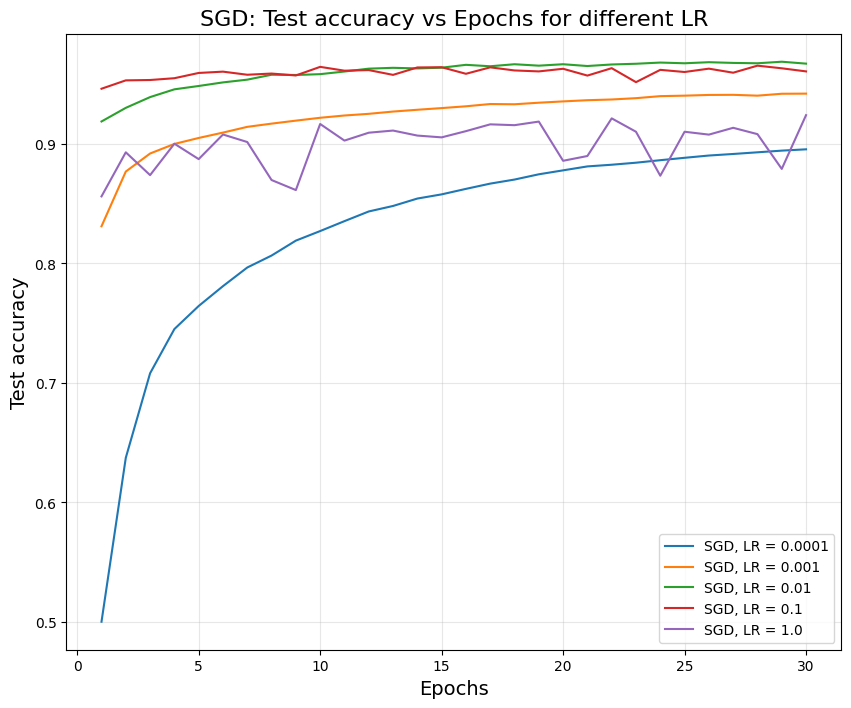

SGD, LR = 0.0001: final test accuracy = 0.8955
SGD, LR = 0.001: final test accuracy = 0.9421
SGD, LR = 0.01: final test accuracy = 0.9672
SGD, LR = 0.1: final test accuracy = 0.9607
SGD, LR = 1.0: final test accuracy = 0.9241

Best SGD LR: 0.01 with final test accuracy: 0.9672


In [11]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
g = torch.Generator().manual_seed(SEED)

# The network class contains the intializer and some methods for our neural network
# You create a network by calling Network([Nodes_Input,Nodes_2,Nodes_3,...,Nodes_Output])
class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)

        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.xavier_normal_(layer.weight)   # Good initialization for shallow/sigmoid nets
            nn.init.zeros_(layer.bias)               # initialize the bias to 0
            self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.sigmoid(layer(x))   # sigmoid layers
        x = self.layers[-1](x)
        return x

# Train function using SGD (for part a)
def train_sgd(network, train_data, epochs, eta, test_data=None):
    optimizer = optim.SGD(network.parameters(), momentum=0.8, nesterov=True, lr=eta, weight_decay=1e-5)
    loss_fn = nn.CrossEntropyLoss()

    loss_history = []
    accuracy_history = []
    train_accuracy_history = []

    for epoch in range(epochs):
        network.train()
        running_loss = 0.0
        batch_count = 0

        for data, target in train_data:
            optimizer.zero_grad()
            output = network(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            batch_count += 1

        avg_loss = running_loss / batch_count
        loss_history.append(avg_loss)

        train_acc = evaluate(network, train_data)
        train_accuracy_history.append(train_acc)

        acc = evaluate(network, test_data)
        accuracy_history.append(acc)

        print(f"Epoch {epoch+1}: Avg loss: {avg_loss:.4f} | Test Accuracy: {acc:.4f} | Train Accuracy: {train_acc:.4f}")

    return loss_history, train_accuracy_history, accuracy_history

# This function evaluates the network on the test data
def evaluate(network, test_data):
    network.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_data:
            output = network(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += data.size(0)
    acc = correct / total
    return acc

# Load MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, generator=g)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False, generator=g)

#Test different learning rates with SGD
sgd_learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
sgd_accuracies = []
sgd_losses = []

for lr in sgd_learning_rates:
    print(f"\nTraining with SGD, learning rate: {lr}")

    #New network for each learning rate
    net = Network([784, 30, 10])

    #Train network with SGD
    loss_history, train_acc_history, test_acc_history = train_sgd(
        net, train_loader, epochs=30, eta=lr, test_data=test_loader)

    #Store results
    sgd_accuracies.append(test_acc_history)
    sgd_losses.append(loss_history)

#Plot results
plt.figure(figsize=(10, 8))
epochs = range(1, 31)

for i, lr in enumerate(sgd_learning_rates):
    plt.plot(epochs, sgd_accuracies[i], label=f'SGD, LR = {lr}')

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.title('SGD: Test accuracy vs Epochs for different LR', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Optimal SGD learning rate
final_sgd_accuracies = [acc_history[-1] for acc_history in sgd_accuracies]
best_sgd_lr_index = np.argmax(final_sgd_accuracies)
best_sgd_lr = sgd_learning_rates[best_sgd_lr_index]
best_sgd_accuracy = final_sgd_accuracies[best_sgd_lr_index]

for i, lr in enumerate(sgd_learning_rates):
    print(f"SGD, LR = {lr}: final test accuracy = {final_sgd_accuracies[i]:.4f}")

print(f"\nBest SGD LR: {best_sgd_lr} with final test accuracy: {best_sgd_accuracy:.4f}")


Training with ADAM, learning rate: 0.0001
Epoch 1: Avg loss: 1.1910 | Test Accuracy: 0.8716 | Train Accuracy: 0.8656
Epoch 2: Avg loss: 0.5463 | Test Accuracy: 0.8989 | Train Accuracy: 0.8955
Epoch 3: Avg loss: 0.4007 | Test Accuracy: 0.9095 | Train Accuracy: 0.9067
Epoch 4: Avg loss: 0.3412 | Test Accuracy: 0.9156 | Train Accuracy: 0.9145
Epoch 5: Avg loss: 0.3072 | Test Accuracy: 0.9219 | Train Accuracy: 0.9198
Epoch 6: Avg loss: 0.2839 | Test Accuracy: 0.9251 | Train Accuracy: 0.9252
Epoch 7: Avg loss: 0.2661 | Test Accuracy: 0.9285 | Train Accuracy: 0.9290
Epoch 8: Avg loss: 0.2517 | Test Accuracy: 0.9314 | Train Accuracy: 0.9324
Epoch 9: Avg loss: 0.2396 | Test Accuracy: 0.9338 | Train Accuracy: 0.9352
Epoch 10: Avg loss: 0.2291 | Test Accuracy: 0.9348 | Train Accuracy: 0.9382
Epoch 11: Avg loss: 0.2198 | Test Accuracy: 0.9387 | Train Accuracy: 0.9401
Epoch 12: Avg loss: 0.2119 | Test Accuracy: 0.9389 | Train Accuracy: 0.9426
Epoch 13: Avg loss: 0.2046 | Test Accuracy: 0.9416 | T

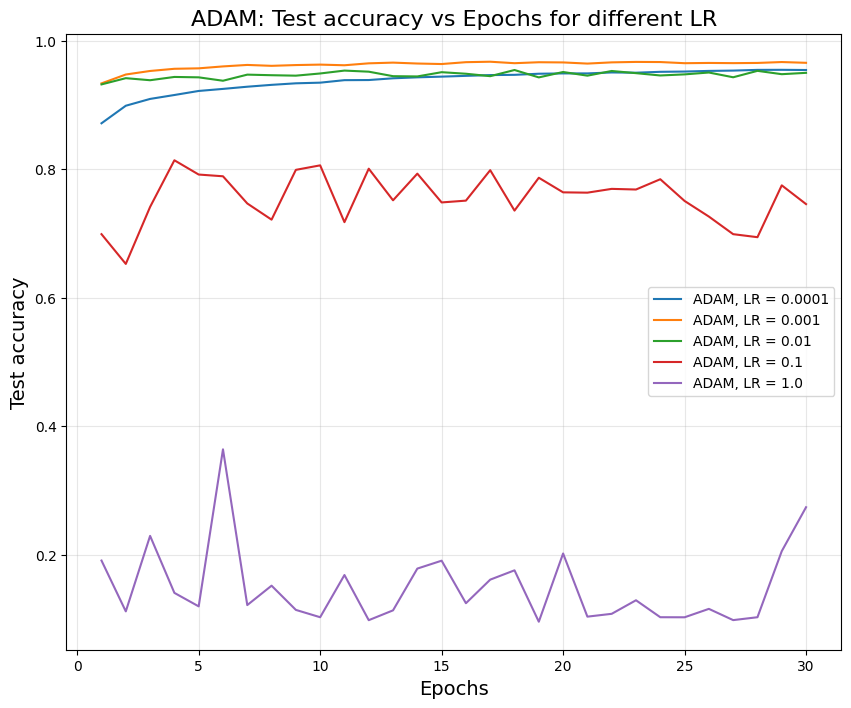

ADAM, LR = 0.0001: final test accuracy = 0.9545
ADAM, LR = 0.001: final test accuracy = 0.9657
ADAM, LR = 0.01: final test accuracy = 0.9501
ADAM, LR = 0.1: final test accuracy = 0.7458
ADAM, LR = 1.0: final test accuracy = 0.2740

Best ADAM LR: 0.001 with final test accuracy: 0.9657


In [12]:
#Train function using ADAM
def train_adam(network, train_data, epochs, eta, test_data=None):
    optimizer = optim.Adam(network.parameters(), betas=(0.9, 0.999), lr=eta, weight_decay=1e-5)
    loss_fn = nn.CrossEntropyLoss()

    loss_history = []
    accuracy_history = []
    train_accuracy_history = []

    for epoch in range(epochs):
        network.train()
        running_loss = 0.0
        batch_count = 0

        for data, target in train_data:
            optimizer.zero_grad()
            output = network(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            batch_count += 1

        avg_loss = running_loss / batch_count
        loss_history.append(avg_loss)

        train_acc = evaluate(network, train_data)
        train_accuracy_history.append(train_acc)

        acc = evaluate(network, test_data)
        accuracy_history.append(acc)

        print(f"Epoch {epoch+1}: Avg loss: {avg_loss:.4f} | Test Accuracy: {acc:.4f} | Train Accuracy: {train_acc:.4f}")

    return loss_history, train_accuracy_history, accuracy_history

#Test different learning rates with ADAM
adam_accuracies = []
adam_losses = []

for lr in sgd_learning_rates:
    print(f"\nTraining with ADAM, learning rate: {lr}")

    #New network for each learning rate
    net = Network([784, 30, 10])

    #Train network with ADAM
    loss_history, train_acc_history, test_acc_history = train_adam(
        net, train_loader, epochs=30, eta=lr, test_data=test_loader)

    #Store results
    adam_accuracies.append(test_acc_history)
    adam_losses.append(loss_history)

#Plot results
plt.figure(figsize=(10, 8))
epochs = range(1, 31)

for i, lr in enumerate(sgd_learning_rates):
    plt.plot(epochs, adam_accuracies[i], label=f'ADAM, LR = {lr}')

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.title('ADAM: Test accuracy vs Epochs for different LR', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Optimal ADAM learning rate
final_adam_accuracies = [acc_history[-1] for acc_history in adam_accuracies]
best_adam_lr_index = np.argmax(final_adam_accuracies)
best_adam_lr = sgd_learning_rates[best_adam_lr_index]
best_adam_accuracy = final_adam_accuracies[best_adam_lr_index]

for i, lr in enumerate(sgd_learning_rates):
    print(f"ADAM, LR = {lr}: final test accuracy = {final_adam_accuracies[i]:.4f}")

print(f"\nBest ADAM LR: {best_adam_lr} with final test accuracy: {best_adam_accuracy:.4f}")

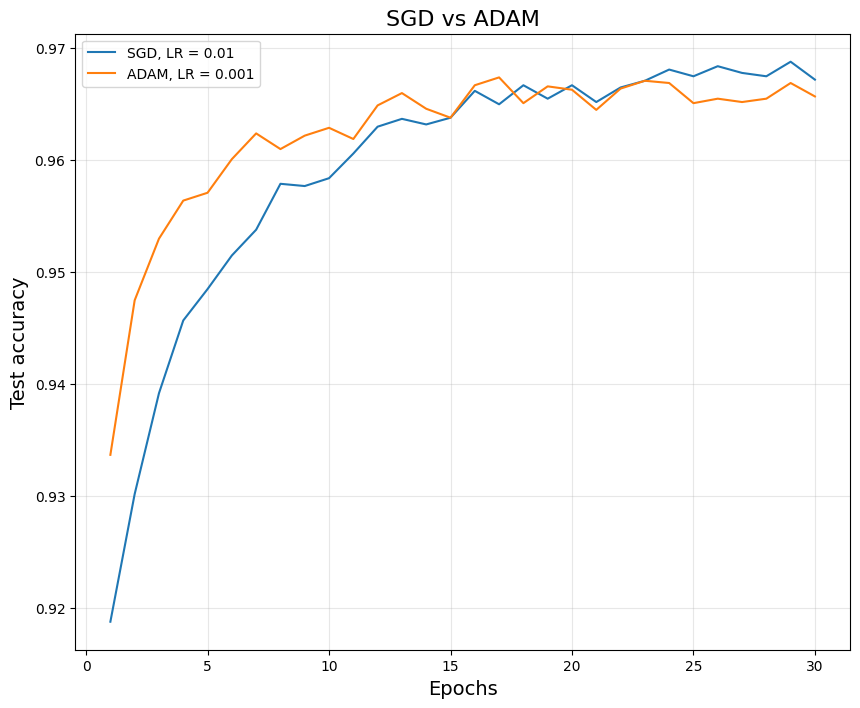

Best SGD configuration: LR = 0.01, Final accuracy = 0.9672
Best ADAM configuration: LR = 0.001, Final accuracy = 0.9657


In [13]:
#Comparison between best performing SGD and ADAM
plt.figure(figsize=(10, 8))
plt.plot(epochs, sgd_accuracies[best_sgd_lr_index], label=f'SGD, LR = {best_sgd_lr}')
plt.plot(epochs, adam_accuracies[best_adam_lr_index], label=f'ADAM, LR = {best_adam_lr}')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.title('SGD vs ADAM', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"Best SGD configuration: LR = {best_sgd_lr}, Final accuracy = {best_sgd_accuracy:.4f}")
print(f"Best ADAM configuration: LR = {best_adam_lr}, Final accuracy = {best_adam_accuracy:.4f}")


Baseline with SGD (best from part a):
Epoch 1: Loss: 0.4023 | Test Accuracy: 0.9265
Epoch 2: Loss: 0.2160 | Test Accuracy: 0.9443
Epoch 3: Loss: 0.1772 | Test Accuracy: 0.9498
Epoch 4: Loss: 0.1552 | Test Accuracy: 0.9503
Epoch 5: Loss: 0.1405 | Test Accuracy: 0.9529
Epoch 6: Loss: 0.1284 | Test Accuracy: 0.9560
Epoch 7: Loss: 0.1194 | Test Accuracy: 0.9594
Epoch 8: Loss: 0.1122 | Test Accuracy: 0.9587
Epoch 9: Loss: 0.1060 | Test Accuracy: 0.9569
Epoch 10: Loss: 0.1009 | Test Accuracy: 0.9593
Epoch 11: Loss: 0.0962 | Test Accuracy: 0.9596
Epoch 12: Loss: 0.0919 | Test Accuracy: 0.9624
Epoch 13: Loss: 0.0879 | Test Accuracy: 0.9610
Epoch 14: Loss: 0.0842 | Test Accuracy: 0.9623
Epoch 15: Loss: 0.0812 | Test Accuracy: 0.9629
Epoch 16: Loss: 0.0785 | Test Accuracy: 0.9624
Epoch 17: Loss: 0.0757 | Test Accuracy: 0.9643
Epoch 18: Loss: 0.0733 | Test Accuracy: 0.9628
Epoch 19: Loss: 0.0716 | Test Accuracy: 0.9629
Epoch 20: Loss: 0.0687 | Test Accuracy: 0.9660
Epoch 21: Loss: 0.0672 | Test 

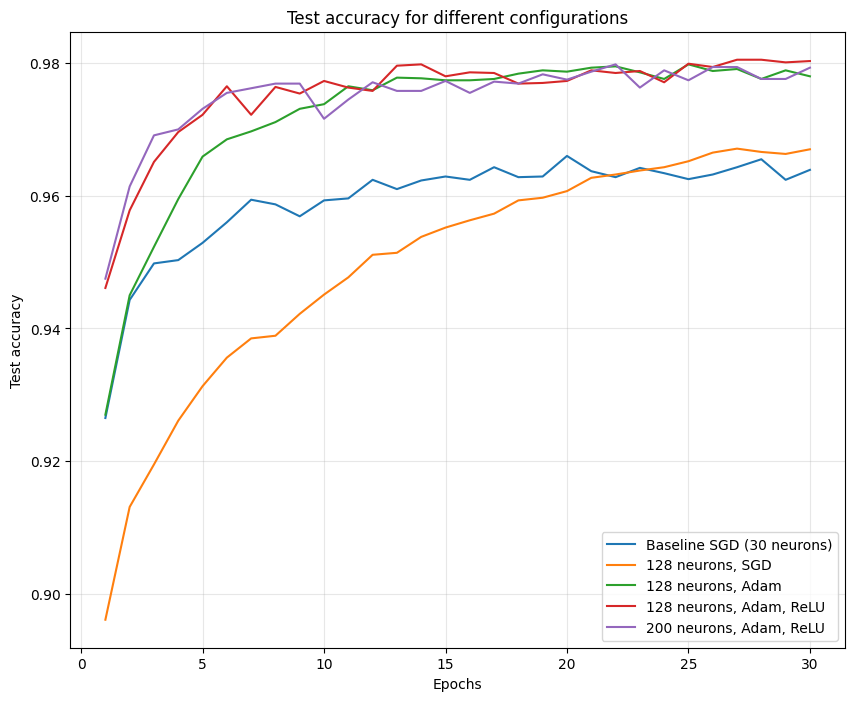

Baseline SGD (30 neurons): 0.9639
128 neurons, SGD: 0.9670
128 neurons, Adam: 0.9780
128 neurons, Adam, ReLU: 0.9803
200 neurons, Adam, ReLU: 0.9793

Best configuration: 128 neurons, Adam, ReLU with accuracy 0.9803


In [14]:
class Network(nn.Module):
    def __init__(self, sizes, activation='sigmoid'):
        super(Network, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.activation = activation

        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])

            #Choose initialization based on activation
            if activation == 'sigmoid':
                nn.init.xavier_normal_(layer.weight)
            else:
                nn.init.kaiming_normal_(layer.weight, mode='fan_out', nonlinearity='relu')

            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers[:-1]:
            if self.activation == 'sigmoid':
                x = F.sigmoid(layer(x))
            elif self.activation == 'relu':
                x = F.relu(layer(x))
        x = self.layers[-1](x)
        return x

#Training function
def train(network, train_data, epochs, lr, weight_decay, test_data=None, use_adam=False):
    if use_adam:
        optimizer = optim.Adam(network.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        optimizer = optim.SGD(network.parameters(), momentum=0.9, lr=lr, weight_decay=weight_decay)

    loss_fn = nn.CrossEntropyLoss()

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        network.train()
        running_loss = 0.0
        batch_count = 0

        for data, target in train_data:
            optimizer.zero_grad()
            output = network(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            batch_count += 1

        avg_loss = running_loss / batch_count
        loss_history.append(avg_loss)

        acc = evaluate(network, test_data)
        accuracy_history.append(acc)

        print(f"Epoch {epoch+1}: Loss: {avg_loss:.4f} | Test Accuracy: {acc:.4f}")

    return loss_history, accuracy_history

# Load MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)

#Different configurations
results = []

#Baseline, best from part a
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, generator=g)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False, generator=g)
net1 = Network([784, 30, 10], activation='sigmoid')
print("\nBaseline with SGD (best from part a):")
_, acc_history1 = train(net1, train_loader, epochs=30, lr=0.01, weight_decay=1e-5, test_data=test_loader)
results.append(('Baseline SGD (30 neurons)', acc_history1))

#Larger hidden layer
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, generator=g)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, generator=g)
net2 = Network([784, 128, 10], activation='sigmoid')
print("\nLarger hidden layer (128 neurons):")
_, acc_history2 = train(net2, train_loader, epochs=30, lr=0.01, weight_decay=1e-5, test_data=test_loader)
results.append(('128 neurons, SGD', acc_history2))

#Adam optimizer
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, generator=g)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, generator=g)
net3 = Network([784, 128, 10], activation='sigmoid')
print("\nAdam optimizer:")
_, acc_history3 = train(net3, train_loader, epochs=30, lr=0.001, weight_decay=1e-5, test_data=test_loader, use_adam=True)
results.append(('128 neurons, Adam', acc_history3))

#ReLU activation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
net4 = Network([784, 128, 10], activation='relu')
print("\nReLU activation:")
_, acc_history4 = train(net4, train_loader, epochs=30, lr=0.001, weight_decay=1e-4, test_data=test_loader, use_adam=True)
results.append(('128 neurons, Adam, ReLU', acc_history4))

#Optimized configuration
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, generator=g)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, generator=g)
net5 = Network([784, 200, 10], activation='relu')
print("\nOptimized configuration (200 neurons, ReLU, Adam):")
_, acc_history5 = train(net5, train_loader, epochs=30, lr=0.001, weight_decay=5e-5, test_data=test_loader, use_adam=True)
results.append(('200 neurons, Adam, ReLU', acc_history5))

#Plot results
plt.figure(figsize=(10, 8))
for name, acc_history in results:
    plt.plot(range(1, len(acc_history)+1), acc_history, label=name)
plt.xlabel('Epochs')
plt.ylabel('Test accuracy')
plt.title('Test accuracy for different configurations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Final accuracies
for name, acc_history in results:
    print(f"{name}: {acc_history[-1]:.4f}")

#Best
best_config = max(results, key=lambda x: x[1][-1])
print(f"\nBest configuration: {best_config[0]} with accuracy {best_config[1][-1]:.4f}")

#Problem 3: Deep Nets: Overcoming Gradients

(a) In deep networks, the gradients for the neural network weights can either vanish or explode due to the compositional nature of the network. This typically happens for weights near the input layer. In order to observe vanishing gradients we need to calculate the size of the gradients of the loss function with respect to each weight. The neural network training routine has commented code that computes the norm of the gradients of the input layer and the norm of the gradients of the output layer and divides and averages them across all the batches in an epoch. Uncomment the code (and modify the print and return statement) so that the gradients are computed and the gradient ratio output and saved.
Then try training a deep neural network. I recommend beginning with the architecture net = Network([784,30,30,30,30,30,30,30,30,10]). Train this neural network. You will almost certainly find that the training does not succeed. What are the gradient ratios that you observe during the training?

If your computer cannot train this network, you can try this problem with a shallower network, or my recommendation is to use only a single epoch of training which should still demonstrate the vanishing gradient problem.

(b) There are several techniques to deal with vanishing (or exploding) gradients. These include using neurons with different activation functions or using different normalization schemes. The forward method in the Network class defines the activation functions. Change the activation function from sigmoid to relu and change the initialization from Xavier.normal_ to kaiming.uniform_ (which is more optimal for deep ReLU neurons) and train the deep neural network. How does the gradient ratio change? How does the test accuracy compare to the shallow net accuracy you achieved in problem 2?

(c) Deep neural networks are a superior architecture of image classification problems than shallow networks, however typically the dense structure that we have implemented here is not used. Instead the neural networks usually have several convolutionary layers at the beginning. With some effort and experimentation, it should still be possible to achieve a very high accuracy with a dense neural network. Experiment with the network architecture and the hyperparameters and see how good you can make your deep/dense network. You can try a combination of increasing the number of neurons in the hidden layers or incrasing the depth of the network. A structure that often works is one which decreases the number of neurons per hidden layer steadily from the input layer to the final layer (i.e. starting at 784 and ending at 10). Can you improve upon the best shallow network that you constructed for problem 3?

**Solution:**

(a) After training the suggested deep neural network with the architecture [784, 30, 30, 30, 30, 30, 30, 30, 30, 10] using sigmoid activations, we got the following results:

- Epoch 1: Avg loss: 2.3094 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00006714

- Epoch 2: Avg loss: 2.3060 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00007943

- Epoch 3: Avg loss: 2.3043 | Test Accuracy: 0.1028 | Train Accuracy: 0.1044 | Grad Ratio: 0.00008450

- Epoch 4: Avg loss: 2.3036 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00008476

- Epoch 5: Avg loss: 2.3033 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00008264

We can clearly see the vanishing gradient problem here. Since the gradient ratio is input layer gradients / output layer gradients, the gradient ratios are roughly 0.00008, which indicates that the gradients at the input layer are nearly 12,500 times smaller than those at the output layer. The training and test accuracies stayed at 0.11 (11%) (near the 10% expected from random guessing on the 10-class MNIST dataset, Mueller, 2010), and the average loss only slightly decreased over the course of 5 epochs (from 2.3094 to 2.3033).  The midpoint of the sigmoid activation function has a maximum derivative of 0.25 (Nielsen, 2015). With eight hidden layers, the gradient would be decreased by a factor of 0.25^8 ≈ 0.00001526 in the best scenario, even if all activations were optimally in the high-gradient region (which is consistent with the observed gradient ratio of about 0.00008).
Here, we can understand why traditional deep networks with sigmoid activations face these training difficulties. The vanishing gradient problem prevents effective training since the weights in the layers closer to the input receive gradients that are too small for meaningful updates.

(b) After training the deep neural network with the architecture [784, 30, 30, 30, 30, 30, 30, 30, 30, 10] using ReLu and Kaiming uniform initialization method, we got the following results:

- Epoch 1: Avg loss: 0.5799 | Test Accuracy: 0.9174 | Train Accuracy: 0.9154 | Grad Ratio: 3.04620687

- Epoch 2: Avg loss: 0.2872 | Test Accuracy: 0.9325 | Train Accuracy: 0.9361 | Grad Ratio: 3.18742653

- Epoch 3: Avg loss: 0.2359 | Test Accuracy: 0.9361 | Train Accuracy: 0.9434 | Grad Ratio: 2.97137533

- Epoch 4: Avg loss: 0.1993 | Test Accuracy: 0.9369 | Train Accuracy: 0.9415 | Grad Ratio: 2.89891228

- Epoch 5: Avg loss: 0.1829 | Test Accuracy: 0.9450 | Train Accuracy: 0.9539 | Grad Ratio: 2.78140328

The gradient ratio increased from approximately 0.00008 with sigmoid activations to around 2.78 with ReLU activations,the vanishing gradient problem is solved in part b. The test accuracy went up from around 11% to 94.50% after just 5 epochs. "Kaiming He initialization is tailored for ReLU activation functions, which are widely used in deep learning. It takes into account the characteristics of ReLU, such as non-saturation for positive inputs, to set appropriate initial weights" (GeeksforGeeks, 2025). This prevents vanishing and exploding gradients during training.

The best shallow network from Problem 2 (128 hidden units, ReLU, Adam, LR=0.001) reached 98.03% test accuracy. So, even though the ReLU/Kaiming changes fixed the vanishing-gradient issue and pushed the deep net far above its sigmoid version, the deep model still lags the shallow model by roughly 3-4 percentage points on MNIST at this point in training. With more epochs, extra regularisation, or a tapered width you might close that gap, but as measured here the shallow net performs better.

(c) Here, we experimented with a tapered network architecture. After trying different configurations, we found that a network with gradually decreasing neuron counts performed best. We implemented a network with architecture [784, 256, 128, 64, 10]. Larger batch size of 64 was use to provide a good balance between speed and convergence. Also, SGD optimizer and weight decay of 1e-5 were used.

We got the following results:

- Epoch 1: Avg loss: 0.2958 | Test Accuracy: 0.9486 | Train Accuracy: 0.9575 | Grad Ratio: 3.76840790

- Epoch 2: Avg loss: 0.1185 | Test Accuracy: 0.9651 | Train Accuracy: 0.9768 | Grad Ratio: 3.93232342

- Epoch 3: Avg loss: 0.0770 | Test Accuracy: 0.9683 | Train Accuracy: 0.9821 | Grad Ratio: 4.00362295

- Epoch 4: Avg loss: 0.0576 | Test Accuracy: 0.9711 | Train Accuracy: 0.9871 | Grad Ratio: 4.12129484

- Epoch 5: Avg loss: 0.0409 | Test Accuracy: 0.9730 | Train Accuracy: 0.9907 | Grad Ratio: 4.21671256

This network performed significantly better than those in parts a and b. The network with sigmoid activations achieved only about 11% accuracy due to vanishing gradients. The uniform network with ReLU reached 94.50% accuracy after 5 epochs. This tapered network reached 97.30% after 5 epochs.

The gradient ratio has increased slightly from 3.77 to 4.22 after 5 epochs, meaning that gradients continued to flow well from output to input layers. ReLU plus Kaiming removes the vanishing gradient problem, just as we saw in part (b). Also, increasing the batch size from 10 to 64, made training faster without sacrificing accuracy. The tapered architecture likely works better because it follows the natural information flow, the network needs more parameters in early layers to capture complex patterns from raw pixels, but can use fewer neurons in later layers as it builds more abstract, compact representations. So, with proper architecture design and modern techniques (ReLU, Kaiming initialization, appropriate layer sizing), deep dense networks can achieve excellent performance on image classification tasks, even without convolutional layers.

In [ ]:
torch.manual_seed(42)

#The network class contains the initializer and some methods for our neural network
class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)

        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.xavier_normal_(layer.weight)   #Good initialization for shallow/sigmoid nets
            nn.init.zeros_(layer.bias)               #initialize the bias to 0
            self.layers.append(layer)

    #Forward is the method that calculates the value of the neural network. Basically we recursively apply the activations in each
    #layer
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.sigmoid(layer(x))   #sigmoid layers
            #x = F.relu(layer(x)) #You will try the relu layer in the last problem
        x = self.layers[-1](x)
        return x

def train(network, train_data, epochs, eta, test_data=None):
    optimizer = optim.SGD(network.parameters(), momentum=0.8, nesterov=True, lr=eta, weight_decay=1e-5)

    loss_fn = nn.CrossEntropyLoss()

    loss_history = []
    accuracy_history = []
    train_accuracy_history = []
    #Uncommented to track gradient ratios
    grad_ratio_history = []

    for epoch in range(epochs):
        network.train()
        running_loss = 0.0
        batch_count = 0
        #Uncommented to track gradient ratios
        grad_ratio_total = 0.0

        for data, target in train_data:
            optimizer.zero_grad()
            output = network(data)
            loss = loss_fn(output, target)
            loss.backward()

            #Uncommented gradient computation code
            grad_input = network.layers[0].weight.grad
            grad_output = network.layers[-1].weight.grad

            # Compute L2 norms
            input_norm = grad_input.norm(2).item()
            output_norm = grad_output.norm(2).item()
            grad_ratio = input_norm/(output_norm+1e-16)
            # Accumulate the grad ratios for this minibatch
            grad_ratio_total += grad_ratio

            optimizer.step()

            running_loss += loss.item()
            batch_count += 1

        # Track our metrics
        avg_loss = running_loss / batch_count
        loss_history.append(avg_loss)

        #Compute average gradient ratio for the epoch
        avg_grad_ratio = grad_ratio_total / batch_count
        grad_ratio_history.append(avg_grad_ratio)

        train_acc = evaluate(network, train_data)
        train_accuracy_history.append(train_acc)

        acc = evaluate(network, test_data)
        accuracy_history.append(acc)

        #Modified print statement to include gradient ratio
        print(f"Epoch {epoch+1}: Avg loss: {avg_loss:.4f} | Test Accuracy: {acc:.4f} | Train Accuracy: {train_acc:.4f} | Grad Ratio: {avg_grad_ratio:.8f}")

    # Modified return statement to include gradient ratio history
    return loss_history, train_accuracy_history, accuracy_history, grad_ratio_history

def evaluate(network, test_data):
    network.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_data:
            output = network(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += data.size(0)
    acc = correct / total
    return acc

# Load MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Initialize network
net = Network([784, 30, 30, 30, 30, 30, 30, 30, 30, 10])

# Train
loss_history, train_acc_history, test_acc_history, grad_ratio_history = train(net, train_loader, epochs=5, eta=0.01, test_data=test_loader)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.9MB/s]


Epoch 1: Avg loss: 2.3094 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00006714
Epoch 2: Avg loss: 2.3060 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00007943
Epoch 3: Avg loss: 2.3043 | Test Accuracy: 0.1028 | Train Accuracy: 0.1044 | Grad Ratio: 0.00008450
Epoch 4: Avg loss: 2.3036 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00008476
Epoch 5: Avg loss: 2.3033 | Test Accuracy: 0.1135 | Train Accuracy: 0.1124 | Grad Ratio: 0.00008264


In [ ]:
torch.manual_seed(42)

# The network class with ReLU and Kaiming initialization
class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)

        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            #from Xavier to Kaiming uniform initialization
            nn.init.kaiming_uniform_(layer.weight, mode='fan_out', nonlinearity='relu')
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers[:-1]:
            #from sigmoid to ReLU activation
            x = F.relu(layer(x))
        x = self.layers[-1](x)
        return x

def train(network, train_data, epochs, eta, test_data=None):
    optimizer = optim.SGD(network.parameters(), momentum=0.8, nesterov=True, lr=eta, weight_decay=1e-5)

    loss_fn = nn.CrossEntropyLoss()

    loss_history = []
    accuracy_history = []
    train_accuracy_history = []
    grad_ratio_history = []

    for epoch in range(epochs):
        network.train()
        running_loss = 0.0
        batch_count = 0
        grad_ratio_total = 0.0

        for data, target in train_data:
            optimizer.zero_grad()
            output = network(data)
            loss = loss_fn(output, target)
            loss.backward()

            grad_input = network.layers[0].weight.grad
            grad_output = network.layers[-1].weight.grad

            # Compute L2 norms
            input_norm = grad_input.norm(2).item()
            output_norm = grad_output.norm(2).item()
            grad_ratio = input_norm/(output_norm+1e-16)
            grad_ratio_total += grad_ratio

            optimizer.step()

            running_loss += loss.item()
            batch_count += 1

        avg_loss = running_loss / batch_count
        loss_history.append(avg_loss)

        avg_grad_ratio = grad_ratio_total / batch_count
        grad_ratio_history.append(avg_grad_ratio)

        train_acc = evaluate(network, train_data)
        train_accuracy_history.append(train_acc)

        acc = evaluate(network, test_data)
        accuracy_history.append(acc)

        print(f"Epoch {epoch+1}: Avg loss: {avg_loss:.4f} | Test Accuracy: {acc:.4f} | Train Accuracy: {train_acc:.4f} | Grad Ratio: {avg_grad_ratio:.8f}")

    return loss_history, train_accuracy_history, accuracy_history, grad_ratio_history

def evaluate(network, test_data):
    network.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_data:
            output = network(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += data.size(0)
    acc = correct / total
    return acc

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Initialize network
relu_net = Network([784, 30, 30, 30, 30, 30, 30, 30, 30, 10])

# Train
relu_loss_history, relu_train_acc_history, relu_test_acc_history, relu_grad_ratio_history = train(relu_net, train_loader, epochs=5, eta=0.01, test_data=test_loader)

Epoch 1: Avg loss: 0.5771 | Test Accuracy: 0.9124 | Train Accuracy: 0.9091 | Grad Ratio: 2.99392698
Epoch 2: Avg loss: 0.2861 | Test Accuracy: 0.9347 | Train Accuracy: 0.9357 | Grad Ratio: 3.25221002
Epoch 3: Avg loss: 0.2316 | Test Accuracy: 0.9391 | Train Accuracy: 0.9454 | Grad Ratio: 2.99059899
Epoch 4: Avg loss: 0.2016 | Test Accuracy: 0.9432 | Train Accuracy: 0.9503 | Grad Ratio: 2.87180480
Epoch 5: Avg loss: 0.1803 | Test Accuracy: 0.9522 | Train Accuracy: 0.9584 | Grad Ratio: 2.83850846


In [ ]:
torch.manual_seed(42)

# The network class with ReLU and Kaiming initialization
class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)

        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.kaiming_uniform_(layer.weight, mode='fan_out', nonlinearity='relu')
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        x = self.layers[-1](x)
        return x

def train(network, train_data, epochs, eta, test_data=None):
    optimizer = optim.SGD(network.parameters(), momentum=0.9, lr=eta, weight_decay=1e-5)
    loss_fn = nn.CrossEntropyLoss()

    loss_history = []
    accuracy_history = []
    train_accuracy_history = []
    grad_ratio_history = []

    for epoch in range(epochs):
        network.train()
        running_loss = 0.0
        batch_count = 0
        grad_ratio_total = 0.0

        for data, target in train_data:
            optimizer.zero_grad()
            output = network(data)
            loss = loss_fn(output, target)
            loss.backward()

            # gradient ratio
            grad_input = network.layers[0].weight.grad
            grad_output = network.layers[-1].weight.grad
            input_norm = grad_input.norm(2).item()
            output_norm = grad_output.norm(2).item()
            grad_ratio = input_norm/(output_norm+1e-16)
            grad_ratio_total += grad_ratio

            optimizer.step()

            running_loss += loss.item()
            batch_count += 1

        avg_loss = running_loss / batch_count
        loss_history.append(avg_loss)

        avg_grad_ratio = grad_ratio_total / batch_count
        grad_ratio_history.append(avg_grad_ratio)

        train_acc = evaluate(network, train_data)
        train_accuracy_history.append(train_acc)

        acc = evaluate(network, test_data)
        accuracy_history.append(acc)

        print(f"Epoch {epoch+1}: Avg loss: {avg_loss:.4f} | Test Accuracy: {acc:.4f} | Train Accuracy: {train_acc:.4f} | Grad Ratio: {avg_grad_ratio:.8f}")

    return loss_history, train_accuracy_history, accuracy_history, grad_ratio_history

def evaluate(network, test_data):
    network.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_data:
            output = network(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += data.size(0)
    acc = correct / total
    return acc

# Load MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)

#Larger batch size for faster training
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize a tapered network
tapered_net = Network([784, 256, 128, 64, 10])

# Train
loss_history, train_acc_history, test_acc_history, grad_ratio_history = train(tapered_net, train_loader, epochs=5, eta=0.01, test_data=test_loader)

Epoch 1: Avg loss: 0.2958 | Test Accuracy: 0.9486 | Train Accuracy: 0.9575 | Grad Ratio: 3.76840779
Epoch 2: Avg loss: 0.1185 | Test Accuracy: 0.9658 | Train Accuracy: 0.9769 | Grad Ratio: 3.93228786
Epoch 3: Avg loss: 0.0768 | Test Accuracy: 0.9670 | Train Accuracy: 0.9816 | Grad Ratio: 4.01316163
Epoch 4: Avg loss: 0.0572 | Test Accuracy: 0.9717 | Train Accuracy: 0.9880 | Grad Ratio: 4.16084222
Epoch 5: Avg loss: 0.0411 | Test Accuracy: 0.9728 | Train Accuracy: 0.9908 | Grad Ratio: 4.25247434


## Reference

1. Nielsen, M. A. (2015). Neural networks and deep learning. http://neuralnetworksanddeeplearning.com/chap5.html

2. Deep learning. (n.d.). https://www.deeplearningbook.org/

3. Mueller, A. (2010, September 23). MNIST for ever. . .. Peekaboo. https://peekaboo-vision.blogspot.com/2010/09/mnist-for-ever.html

4. GeeksforGeeks. (2025, April 2). Kaiming Initialization in deep learning. GeeksforGeeks. https://www.geeksforgeeks.org/kaiming-initialization-in-deep-learning/